In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Reports/50_Startups.csv")

In [5]:
x = df.drop(columns=["Profit"])
y = df["Profit"]

Building the 1st model which is the mean of the df [y]


In [33]:
df["pred1"] = y.mean()

Residual of 1st model: profit-pred1


In [34]:
df["res1"] = y - y.mean()

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Decision Tree with x as input and res1 as output


In [36]:
from sklearn.tree import DecisionTreeRegressor

# depth varies from 8 to 32 depending on the number of samples
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(x_train, df.loc[x_train.index, "res1"])

DecisionTreeRegressor(max_leaf_nodes=8)

Visualize the Tree


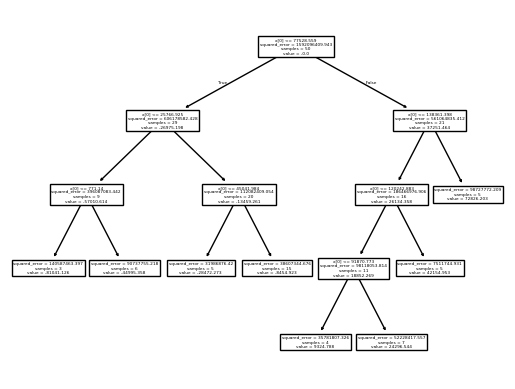

In [24]:
from sklearn.tree import plot_tree

plot_tree(tree1)
plt.show()

In [38]:
y_pred1 = y.mean() + tree1.predict(x_test)

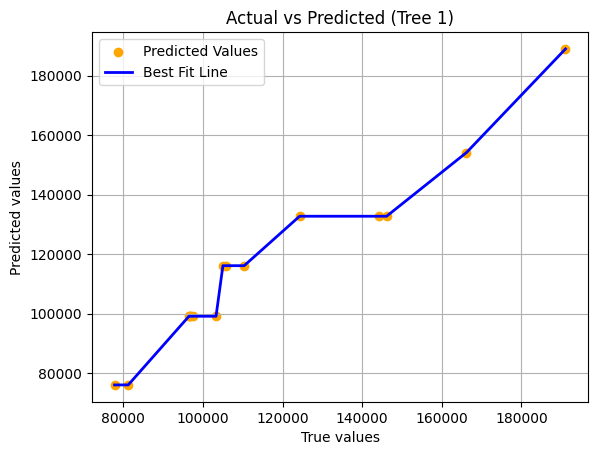

In [56]:
plt.scatter(y_test, y_pred1, color="orange", label="Predicted Values")
plt.plot(
    np.sort(y_test), np.sort(y_pred1), color="blue", linewidth=2, label="Best Fit Line"
)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted (Tree 1)")
plt.legend()
plt.grid(True)
plt.show()

In [40]:
df["pred2"] = y.mean() + tree1.predict(x)
df["res2"] = y - df["pred2"]

In [43]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

tree2.fit(x_train, df.loc[x_train.index, "res2"])

DecisionTreeRegressor(max_leaf_nodes=8)

In [44]:
y_pred2 = y.mean() + tree1.predict(x_test) + tree2.predict(x_test)

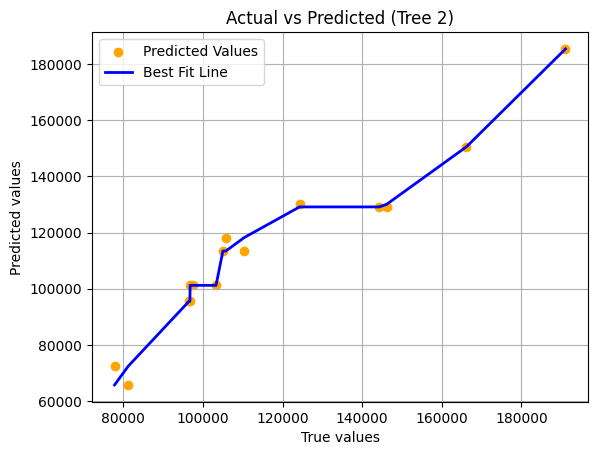

In [57]:
plt.scatter(y_test, y_pred2, color="orange", label="Predicted Values")
plt.plot(
    np.sort(y_test), np.sort(y_pred2), color="blue", linewidth=2, label="Best Fit Line"
)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted (Tree 2)")
plt.legend()
plt.grid(True)
plt.show()

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [47]:
mae = mean_absolute_error(y_test, y_pred2)
rmse = mean_squared_error(y_test, y_pred2, squared=False)
r2 = r2_score(y_test, y_pred2)
n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

d:\academics\ML\Exposys\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [48]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print(f"Adjusted R² Score: {adjusted_r2}")

Mean Absolute Error (MAE): 7769.301814444446
Root Mean Squared Error (RMSE): 9566.954565339101
R² Score: 0.9051780592102039
Adjusted R² Score: 0.8793175299038959


In [49]:
def gradient_boost(x, y, n_estimators, learning_rate, max_depth=5):
    residuals = y
    models = []
    for i in range(n_estimators):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        tree.fit(x, residuals)
        prediction = tree.predict(x)
        residuals -= learning_rate * prediction
        models.append(tree)

        # Plot residuals
        plt.figure(figsize=(10, 6))
        plt.scatter(range(len(residuals)), residuals, alpha=0.7, color="blue")
        plt.xlabel("Sample index")
        plt.ylabel("Residual")
        plt.title(f"Residuals after {i+1} iterations")
        plt.grid(True)
        plt.show()

    return models

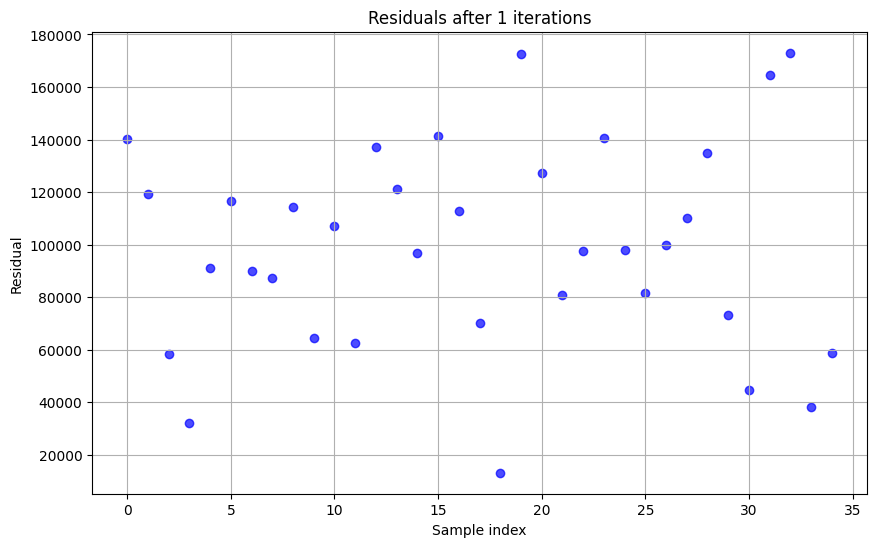

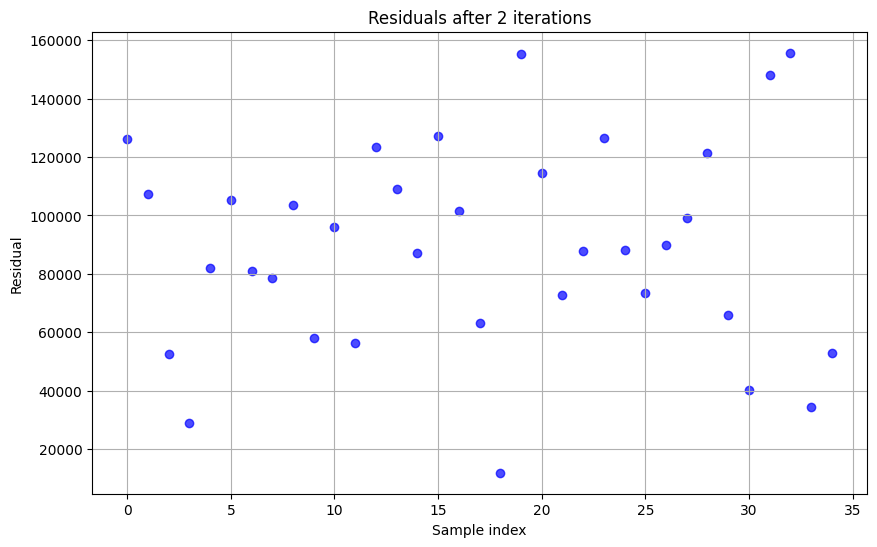

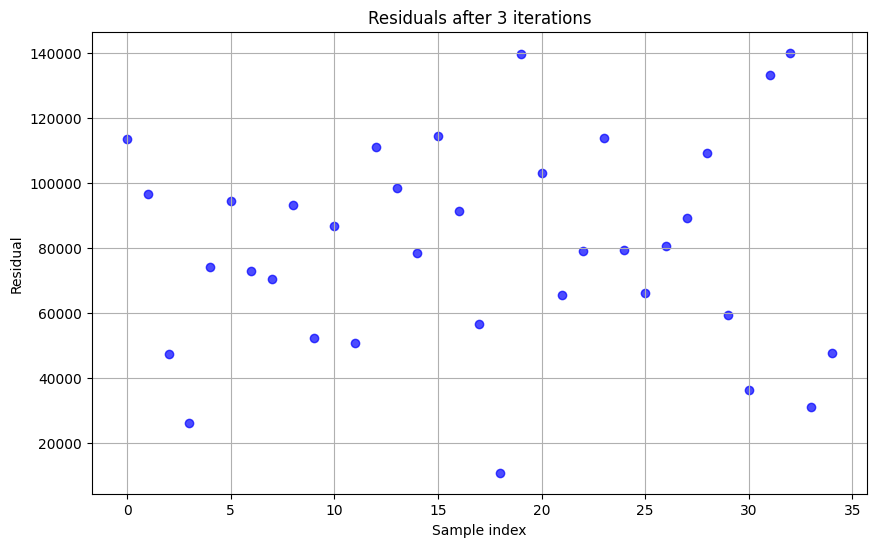

In [50]:
models = gradient_boost(x_train, y_train, n_estimators=3, learning_rate=0.1)

In [51]:
y_pred_boosted = y.mean()
for model in models:
    y_pred_boosted += 0.1 * model.predict(x_test)

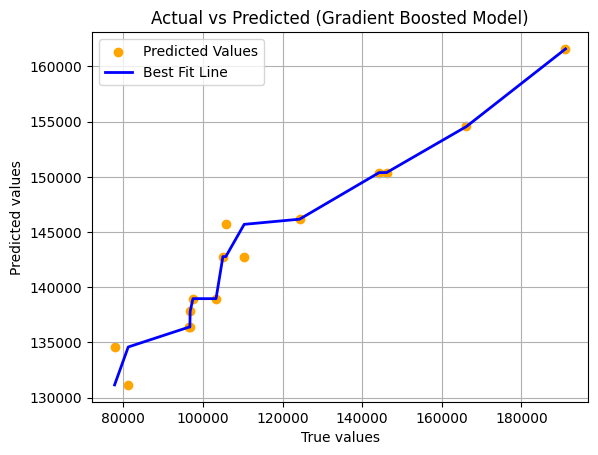

In [54]:
plt.scatter(y_test, y_pred_boosted, color="orange", label="Predicted Values")
plt.plot(
    np.sort(y_test),
    np.sort(y_pred_boosted),
    color="blue",
    linewidth=2,
    label="Best Fit Line",
)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted (Gradient Boosted Model)")
plt.legend()
plt.grid(True)
plt.show()